In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("zomato.csv", encoding='ISO-8859-1', engine='python', on_bad_lines='skip')

In [11]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51118 entries, 0 to 51117
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51118 non-null  object
 1   address                      51118 non-null  object
 2   name                         51118 non-null  object
 3   online_order                 51118 non-null  object
 4   book_table                   51118 non-null  object
 5   rate                         43343 non-null  object
 6   votes                        51118 non-null  int64 
 7   phone                        49915 non-null  object
 8   location                     51097 non-null  object
 9   rest_type                    50894 non-null  object
 10  dish_liked                   23044 non-null  object
 11  cuisines                     51073 non-null  object
 12  approx_cost(for two people)  50774 non-null  object
 13  reviews_list                 51

,0
url,0
address,0
name,0
online_order,0
book_table,0
rate,7775
votes,0
phone,1203
location,21
rest_type,224


In [12]:
df = df.drop(['url', 'phone'], axis=1)
df['rate'] = df['rate'].replace('NEW', None).replace('-', None).str.extract(r'(\d+\.\d+)').astype(float)
df.dropna(subset=['rate'], inplace=True)

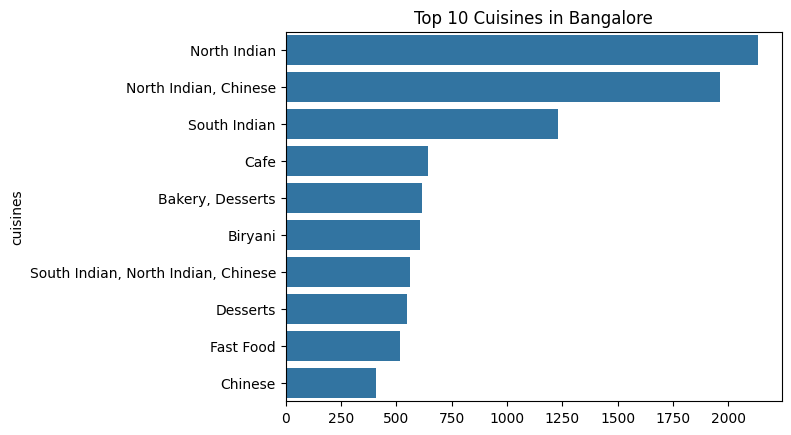

In [13]:
top_cuisines = df['cuisines'].value_counts()[:10]
sns.barplot(x=top_cuisines.values, y=top_cuisines.index)
plt.title("Top 10 Cuisines in Bangalore")
plt.show()

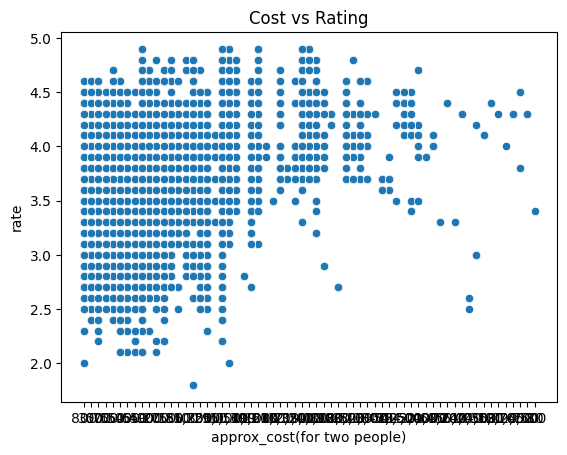

In [14]:
sns.scatterplot(x='approx_cost(for two people)', y='rate', data=df)
plt.title("Cost vs Rating")
plt.show()

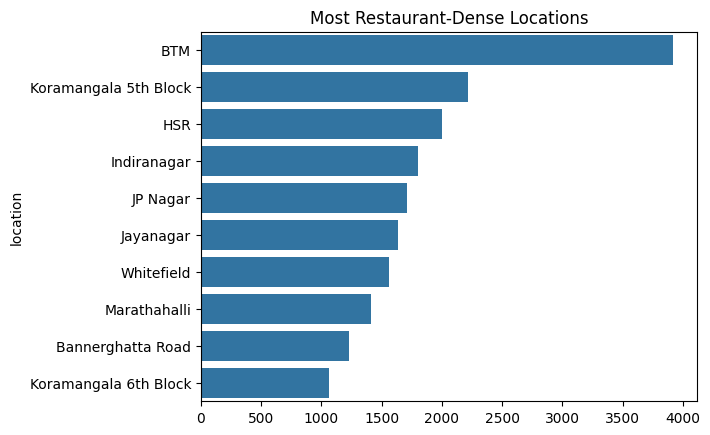

In [15]:
top_locations = df['location'].value_counts()[:10]
sns.barplot(x=top_locations.values, y=top_locations.index)
plt.title("Most Restaurant-Dense Locations")
plt.show()